In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.constants import e, h, c
from scipy.signal import find_peaks
from matplotlib.ticker import MultipleLocator
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit

In [149]:
file_path = Path('Data/task 2 profile data.csv')
data = pd.read_csv(file_path, header=None, skiprows=3,sep=';', names=['x', 'y'])
#display(data)

In [150]:
# Smooth the data with a gaussian smooth
sigma = 1
smoothed_y = gaussian_filter1d(data['y'], sigma=sigma)
a = 1.9909e-9
b = 88.288e-9
c = -0.9342
d = 7.4257e-9

For the first part of task 2, grid spacing:

In [151]:
# Find peaks with the find_peaks function from scipy.signal
x, y = data['x'], data['y']
threshold = 7e-9
peaks_idx, props = find_peaks(y, height=threshold, distance=15)

# Extract corresponding x and y values
peaks_x = x.iloc[peaks_idx]
peaks_y = y[peaks_idx]
print(peaks_y)
peaks = pd.DataFrame({'x': peaks_x, 'y': peaks_y})
peaks = peaks.reset_index(drop=True)

peaks['Peak Distance'] = peaks['x'].diff()

pd.options.display.float_format= '{:.2e}'.format
display(peaks)
mean_peak_dist = peaks['Peak Distance'].mean()
print(f'Mean peak distance: {mean_peak_dist:.2e} m')
print(f'From fit parameters, peak-to-peak distance is {b:.2e} m')



10   9.10e-09
29   9.09e-09
53   9.29e-09
Name: y, dtype: float64


,x,y,Peak Distance
0,4.43e-08,9.10e-09,NaN
1,1.21e-07,9.09e-09,7.65e-08
2,2.17e-07,9.29e-09,9.66e-08


Mean peak distance: 8.65e-08 m
From fit parameters, peak-to-peak distance is 8.83e-08 m


In [152]:
# # Find peaks with the find_peaks function from scipy.signal
# x, y = data['x'], smoothed_y
# threshold = 7e-9
# peaks_idx, props = find_peaks(smoothed_y, height=threshold, distance=15)

# # Extract corresponding x and y values
# peaks_x = x.iloc[peaks_idx]
# peaks_y = y[peaks_idx]
# peaks = pd.DataFrame({'x': peaks_x, 'y': peaks_y})
# peaks = peaks.reset_index(drop=True)

# peaks['Peak Distance'] = peaks['x'].diff()
# peaks['Peak Height']=peaks['y'] - y.min()

# pd.options.display.float_format= '{:.2e}'.format
# display(peaks)
# mean_peak_dist = peaks['Peak Distance'].mean()
# print(f'Mean peak distance: {mean_peak_dist:.2e} m')



#### Fit line came from fitting function within Gwyddion

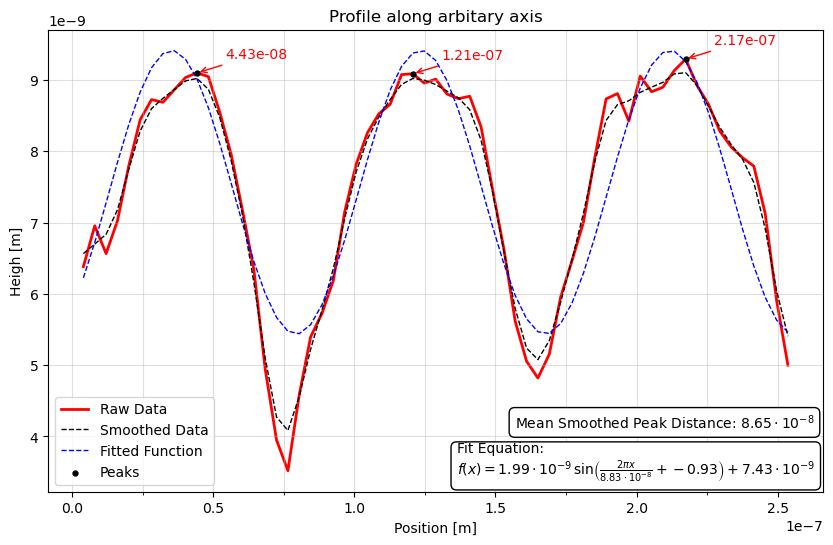

In [153]:
def latex_sci(num, precision=2):
    fmt = f"{{:.{precision}e}}"
    mant, exp = fmt.format(num).split("e")
    return rf"{mant} \cdot 10^{{{int(exp):d}}}"

string_raw = [a, b, c, d]
# string_latex = [latex_sci(num) for num in string_raw]
# a_latex = string_latex[0]
# b_latex = string_latex[1]
# c_latex = string_latex[2]
# d_latex = string_latex[3]


def fit_function(x, a, b, c, d):
    return a * np.sin(2 * np.pi * x / b + c) + d

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data['x'], data['y'], label='Raw Data',
        color='red', ls='-', lw=2, zorder=1)
ax.plot(data['x'], smoothed_y, label='Smoothed Data',
        color='black', ls='--', lw=1, zorder=2)
ax.set_title('Profile along arbitary axis')
ax.set_xlabel('Position [m]')
ax.set_ylabel('Heigh [m]')

###########################################################
################# Vertical line for debug #################
#ax.axvline(x=88.288e-9, color='blue', linestyle='-', lw=1)
###########################################################

ax.plot(data['x'], fit_function(data['x'], a, b, c, d), color='blue', ls='--', lw=1, label='Fitted Function', zorder=3)
ax.scatter(peaks['x'], peaks['y'], color='black', label='Peaks', marker='.', s=50, zorder=4)
for x, y in zip(peaks_x, peaks_y):
    ax.annotate(f'{x:.2e}',
            xy=(x, y),
            xytext=((x + 0.1e-7, y + 2e-10)),
            arrowprops=dict(arrowstyle='->', color='red'),
            color='red'
    )

    
#############################################################
############ Plot the fit function in a text box ############
eq_text = (
    r'Fit Equation:' + '\n' +
    rf'$f(x) = {latex_sci(a)} \,\sin\!\left(\frac{{2\pi x}}{{{{{latex_sci(b)}}}}} + {c:.2f}\right) + {latex_sci(d)}$'
)
eq_text_2 = rf'Mean Smoothed Peak Distance: ${latex_sci(mean_peak_dist)}$'

plt.text(
    0.527, 0.11,
    eq_text,
    horizontalalignment='left',
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top', bbox=dict(boxstyle='round,pad=0.4', fc='white', edgecolor='black')
)

plt.text(
    0.602, 0.15,
    eq_text_2,
    horizontalalignment='left',
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='center', bbox=dict(boxstyle='round,pad=0.4', fc='white', edgecolor='black')
)
ax.xaxis.set_major_locator(MultipleLocator(0.5e-7))
ax.xaxis.set_minor_locator(MultipleLocator(0.25e-7))
ax.grid(True, which='both', ls='-', alpha=0.4)
ax.legend()
plt.show()

Start of drift stuff

In [154]:
file_path = Path('Data/task 2 drift data 2.csv')
drift_data = pd.read_csv(file_path, header=None, skiprows=3,sep=';', names=['x', 'y'])
x = drift_data['x'] * 1e6
y = drift_data['y'] * 1e9
drift_data['x'] = x
drift_data['y'] = y
display(drift_data)

,x,y
0,0.00e+00,8.35e+00
1,4.04e-03,8.34e+00
2,8.09e-03,8.18e+00
3,1.21e-02,8.32e+00
4,1.62e-02,8.39e+00
...,...,...
112,4.53e-01,7.29e+00
113,4.57e-01,6.65e+00
114,4.61e-01,5.57e+00
115,4.65e-01,4.58e+00


In [155]:
smoothed_y_drift = gaussian_filter1d(drift_data['y'], sigma=sigma)

# Find peaks with the find_peaks function from scipy.signal
drift_x, drift_y = drift_data['x'], drift_data['y']
threshold = 6
drift_peaks_idx, props = find_peaks(drift_y, height=threshold, distance=10)

# Extract corresponding x and y values
drift_peaks_x = drift_x.iloc[drift_peaks_idx]
drift_peaks_y = drift_y[drift_peaks_idx]
drift_peaks = pd.DataFrame({'x': drift_peaks_x, 'y': drift_peaks_y})
drift_peaks = drift_peaks.reset_index(drop=True)

drift_peaks_display = pd.DataFrame({'x': drift_peaks_x * 1e-6, 'y': drift_peaks_y * 1e-9})
drift_peaks_display['Peak Distance'] = drift_peaks_display['x'].diff()

pd.options.display.float_format= '{:.2e}'.format
display(drift_peaks_display)
mean_peak_dist = drift_peaks_display['Peak Distance'].mean()
print(f'Mean peak distance: {mean_peak_dist:.2e} m')



,x,y,Peak Distance
7,2.83e-08,8.84e-09,NaN
19,7.68e-08,9.97e-09,4.85e-08
32,1.29e-07,8.86e-09,5.26e-08
42,1.70e-07,9.96e-09,4.04e-08
61,2.47e-07,9.47e-09,7.68e-08
86,3.48e-07,9.39e-09,1.01e-07
97,3.92e-07,7.47e-09,4.45e-08
109,4.41e-07,8.74e-09,4.85e-08


Mean peak distance: 5.89e-08 m


In [156]:
# Find minima to break dataset into multiple regions and find fit curves for each region
minima=[]
inverted_threshold = -9
inverted_x, inverted_y = drift_data['x'], drift_data['y'] * -1
inverted_data = pd.DataFrame({'x': inverted_x, 'y': inverted_y})
minima_idx, props = find_peaks(inverted_data['y'], height=inverted_threshold, distance=15)
minima_idx = np.append(minima_idx, len(drift_x) - 1)
minima_x = inverted_x.iloc[minima_idx]
minima_y = inverted_y.iloc[minima_idx]

last_idx = len(drift_data) - 1
minima = pd.DataFrame({'x': minima_x, 'y': minima_y * -1})

display(minima)

,x,y
2,8.09e-03,8.18e+00
26,1.05e-01,7.78e+00
51,2.06e-01,7.29e+00
72,2.91e-01,7.13e+00
94,3.80e-01,5.73e+00
116,4.69e-01,4.20e+00


### Make sure you don't use the collapsed plot and stuff, use the one at the end
This is for the peak drift for task 2

I tried modeling the peaks with quadratic functions, but it wasn't a great fit. If we want to include that plot on the report, I can recreate it in about 3 seconds, just let me know if you think you want to.

In [157]:
def quad_func(x, a, x0, b):
    return a * (x - x0) ** 2 + b

segments = []
fit_params = []
x_distances_forward = []
for i in range(len(minima_idx) - 1):
    start_idx = minima_idx[i]
    end_idx = minima_idx[i + 1]

    segment = drift_data.iloc[start_idx:end_idx + 1]
    segments.append(segment)

    x = segment['x'].values
    y = segment['y'].values

    # Initial guesses: curvature, center, vertical shift
    a0 = -10
    x0 = x[np.argmax(y)] # guess vertex at lowest point
    b0 = max(y)
    #print(f'Initial guesses: \n a0={a0}, x0={x0}, b0={b0}')
    x_distances_forward.append(x0)
    try:
        popt, _ = curve_fit(quad_func, x, y, p0=(a0, x0, b0))
        fit_params.append(popt)
        print(f"Segment {i+1}: a={popt[0]:.2f}, x0={popt[1]:.2f}, b={popt[2]:.2f}")
    except RuntimeError:
        print(f"Segment {i+1}: fit failed")
        fit_params.append(None)

print(fit_params)



Segment 1: a=-573.65, x0=0.06, b=9.54
Segment 2: a=-811.05, x0=0.16, b=9.65
Segment 3: a=-1193.35, x0=0.25, b=9.58
Segment 4: a=-1496.65, x0=0.33, b=9.59
Segment 5: a=-1743.01, x0=0.42, b=8.45
[array([-5.73650835e+02,  6.40076233e-02,  9.54062260e+00]), array([-8.11045698e+02,  1.59119485e-01,  9.65138452e+00]), array([-1.19335011e+03,  2.49789361e-01,  9.58403563e+00]), array([-1.49665044e+03,  3.33418365e-01,  9.58968707e+00]), array([-1.74300847e+03,  4.23044295e-01,  8.45076191e+00])]


In [158]:
delta_x_forward = np.diff(x_distances_forward)
#print(delta_x_forward)
average_distance_forward = np.mean(delta_x_forward)
print(f'The average distance is {average_distance_forward}.')

total_x_distance_forward = x_distances_forward[-2] - x_distances_forward[0]
print(f'Total distance is {total_x_distance_forward}')
time_per_line = 60e-3 # in seconds
line_size = 500e-9 # in m

The average distance is 0.09099045624999999.
Total distance is 0.270949355


In [159]:
display(drift_data['x'].tail())

112   4.53e-01
113   4.57e-01
114   4.61e-01
115   4.65e-01
116   4.69e-01
Name: x, dtype: float64

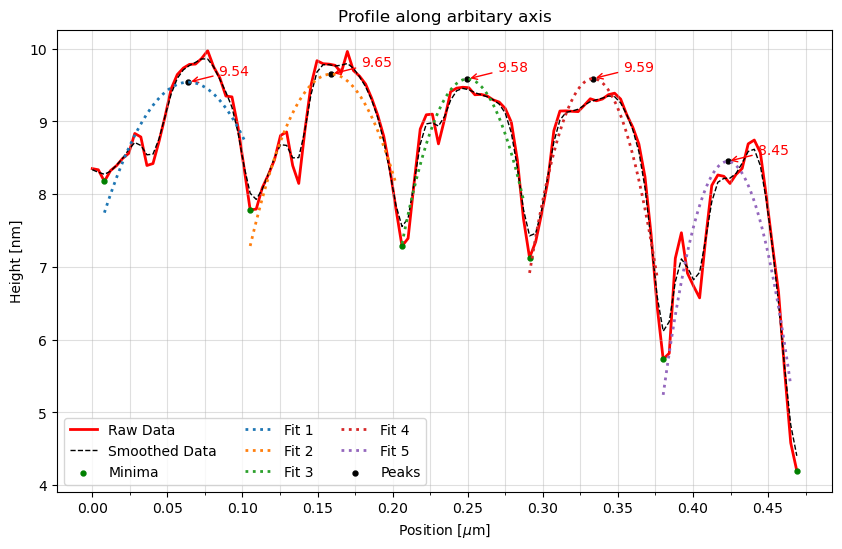

In [160]:
fig, ax = plt.subplots(figsize=(10,6))

###########################################################
###################### Plot raw data ######################
###########################################################
ax.plot(drift_data['x'], drift_data['y'], label='Raw Data',
        color='red', ls='-', lw=2, zorder=1)

###########################################################
################### Plot smoothed data ####################
###########################################################
ax.plot(drift_data['x'], smoothed_y_drift, label='Smoothed Data',
        color='black', ls='--', lw=1, zorder=2)
ax.set_title('Profile along arbitary axis')
ax.set_xlabel(r'Position [$\mu$m]')
ax.set_ylabel('Height [nm]')

###########################################################
################# Vertical line for debug #################
#ax.axvline(x=88.288e-9, color='blue', linestyle='-', lw=1)
###########################################################

ax.scatter(minima['x'], minima['y'], color='green', label='Minima', marker='.', s=50, zorder=5)

max_x_values = []
max_y_values = []
### Plot fit lines
drift_x = drift_data['x'].values
for i in range(len(minima_idx) - 1):
    start_idx = minima_idx[i]
    end_idx = minima_idx[i + 1]

    x_segment = drift_x[start_idx:end_idx]

    a, x0, b = fit_params[i]

    x_fit = np.linspace(x_segment[0], x_segment[-1], 300)
    y_fit = a * (x_fit - x0) ** 2 + b

    ax.plot(x_fit, y_fit, ':', label=f'Fit {i+1}', zorder=6, lw=2)
    max_id = np.argmax(y_fit)
    x_fit = x_fit
    max_x_values.append(x_fit[max_id]) 
    max_y_values.append(y_fit[max_id])

### Plot drift peaks
ax.scatter(max_x_values, max_y_values, color='black', label='Peaks', marker='.', s=50, zorder=4)
for x, y in zip(max_x_values, max_y_values):
    ax.annotate(f'{y:.2f}',
            xy=(x, y),
            xytext=((x + .02, y + .1)),
            arrowprops=dict(arrowstyle='->', color='red'),
            color='red'
    )


#############################################################
############ Plot the fit function in a text box ############
# eq_text = (
#     r'Fit Equation:' + '\n' +
#     rf'$f(x) = {latex_sci(a)} \,\sin\!\left(\frac{{2\pi x}}{{{{{latex_sci(b)}}}}} + {c:.2f}\right) + {latex_sci(d)}$'
# )
# eq_text_2 = rf'Mean Smoothed Peak Distance: ${latex_sci(mean_peak_dist)}$'

# plt.text(
#     0.527, 0.11,
#     eq_text,
#     horizontalalignment='left',
#     transform=plt.gca().transAxes,
#     fontsize=10,
#     verticalalignment='top', bbox=dict(boxstyle='round,pad=0.4', fc='white', edgecolor='black')
# )

# plt.text(
#     0.602, 0.15,
#     eq_text_2,
#     horizontalalignment='left',
#     transform=plt.gca().transAxes,
#     fontsize=10,
#     verticalalignment='center', bbox=dict(boxstyle='round,pad=0.4', fc='white', edgecolor='black')
# )


ax.xaxis.set_major_locator(MultipleLocator(.05))
ax.xaxis.set_minor_locator(MultipleLocator(.025))
ax.grid(True, which='both', ls='-', alpha=0.4)
ax.legend(ncol=3)
plt.show()

In [161]:
max_x_values = [x * 1e-7 for x in max_x_values]
max_y_values = [y * 1e-9 for y in max_y_values]
max_drift_values = pd.DataFrame({'x': max_x_values, 'y': max_y_values})
max_drift_values['Peak Difference'] = max_drift_values['y'].diff()
display(max_drift_values)

,x,y,Peak Difference
0,6.41e-09,9.54e-09,NaN
1,1.59e-08,9.65e-09,1.11e-10
2,2.50e-08,9.58e-09,-6.73e-11
3,3.33e-08,9.59e-09,5.64e-12
4,4.23e-08,8.45e-09,-1.14e-09


In [162]:
file_path = Path('Data/task 2 drift data 2.csv')
drift_data2 = pd.read_csv(file_path, header=None, skiprows=3,sep=';', names=['x', 'y'])
#display(drift_data2)


In [163]:
# Find peaks with the find_peaks function from scipy.signal
x, y = drift_data2['x'], drift_data2['y']
threshold = 7e-9
peaks_idx, props = find_peaks(y, height=threshold, distance=15)

# Extract corresponding x and y values
drift2_peaks_x = x.iloc[peaks_idx]
drift2_peaks_y = y[peaks_idx]
drift2_peaks = pd.DataFrame({'x': drift2_peaks_x, 'y': drift2_peaks_y})
drift2_peaks = drift2_peaks.reset_index(drop=True)

drift2_peaks['Height Drift'] = drift2_peaks['y'].diff()

pd.options.display.float_format= '{:.2e}'.format
display(drift2_peaks)
mean_peak_drift = drift2_peaks['Height Drift'].mean()
print(f'Mean peak drift: {mean_peak_drift:.2e} m')


,x,y,Height Drift
0,7.68e-08,9.97e-09,NaN
1,1.70e-07,9.96e-09,-9.88e-12
2,2.47e-07,9.47e-09,-4.92e-10
3,3.48e-07,9.39e-09,-8.16e-11
4,4.41e-07,8.74e-09,-6.44e-10


Mean peak drift: -3.07e-10 m


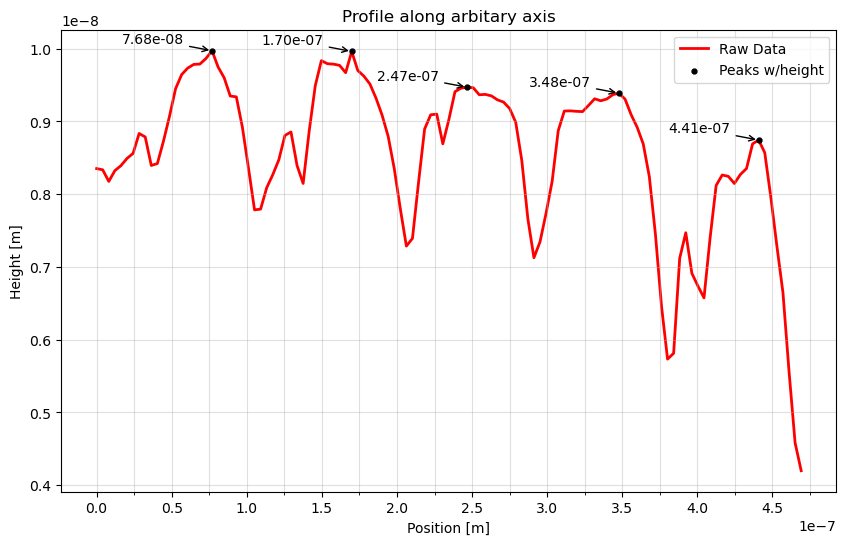

In [164]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drift_data2['x'], drift_data2['y'], label='Raw Data',
        color='red', ls='-', lw=2, zorder=1)
# ax.plot(drift_data2['x'], smoothed_y, label='Smoothed drift_Data2',
#         color='black', ls='--', lw=1, zorder=2)
ax.set_title('Profile along arbitary axis')
ax.set_xlabel('Position [m]')
ax.set_ylabel('Height [m]')

###########################################################
################# Vertical line for debug #################
#ax.axvline(x=88.288e-9, color='blue', linestyle='-', lw=1)
###########################################################

ax.scatter(drift2_peaks['x'], drift2_peaks['y'], color='black', label='Peaks w/height', marker='.', s=50, zorder=4)
for x, y in zip(drift2_peaks_x, drift2_peaks_y):
    ax.annotate(f'{x:.2e}',
            xy=(x, y),
            xytext=((x - .6e-7, y + 1e-10)),
            arrowprops=dict(arrowstyle='->', color='black'),
            color='black'
    )

ax.xaxis.set_major_locator(MultipleLocator(0.5e-7))
ax.xaxis.set_minor_locator(MultipleLocator(0.25e-7))
ax.grid(True, which='both', ls='-', alpha=0.4)
ax.legend()
plt.show()

In [165]:
file_path = Path('Data/task 2 drift data 3.csv')
drift_data = pd.read_csv(file_path, header=None, skiprows=3,sep=',', names=['x', 'y'])
x = drift_data['x'] * 1e6
y = drift_data['y'] * 1e9
drift_data['x'] = x
drift_data['y'] = y
#display(drift_data)

In [166]:
smoothed_y_drift = gaussian_filter1d(drift_data['y'], sigma=sigma)

# Find peaks with the find_peaks function from scipy.signal
drift_x, drift_y = drift_data['x'], drift_data['y']
threshold = 6
drift_peaks_idx, props = find_peaks(drift_y, height=threshold, distance=10)

# Extract corresponding x and y values
drift_peaks_x = drift_x.iloc[drift_peaks_idx]
drift_peaks_y = drift_y[drift_peaks_idx]
drift_peaks = pd.DataFrame({'x': drift_peaks_x, 'y': drift_peaks_y})
drift_peaks = drift_peaks.reset_index(drop=True)

drift_peaks_display = pd.DataFrame({'x': drift_peaks_x * 1e-6, 'y': drift_peaks_y * 1e-9})
drift_peaks_display['Peak Distance'] = drift_peaks_display['x'].diff()

pd.options.display.float_format= '{:.2e}'.format
display(drift_peaks_display)
mean_peak_dist = drift_peaks_display['Peak Distance'].mean()
print(f'Mean peak distance: {mean_peak_dist:.2e} m')



,x,y,Peak Distance
4,1.62e-08,1.17e-08,NaN
15,6.07e-08,1.19e-08,4.45e-08
34,1.38e-07,1.22e-08,7.69e-08
58,2.35e-07,1.19e-08,9.72e-08
83,3.36e-07,1.25e-08,1.01e-07


Mean peak distance: 8.00e-08 m


In [167]:
# Find minima to break dataset into multiple regions and find fit curves for each region
minima=[]
minima_idx= []
minima_idx = np.append(minima_idx, 0)
inverted_threshold = -9
inverted_x, inverted_y = drift_data['x'], drift_data['y'] * -1
inverted_data = pd.DataFrame({'x': inverted_x, 'y': inverted_y})
minima_idx_from_func, props = find_peaks(inverted_data['y'], height=inverted_threshold, distance=15)
minima_idx = np.append(minima_idx, minima_idx_from_func)
minima_idx = minima_idx.astype(int)  # Ensure integer indices for iloc
minima_x = inverted_x.iloc[minima_idx]
minima_y = inverted_y.iloc[minima_idx]

last_idx = len(drift_data) - 1
minima = pd.DataFrame({'x': minima_x, 'y': minima_y * -1})
print("Locations of MINIMA")
display(minima)

Locations of MINIMA


,x,y
0,0.00e+00,1.01e+01
19,7.69e-02,8.88e+00
39,1.58e-01,7.93e+00
64,2.59e-01,7.74e+00
88,3.56e-01,6.34e+00


In [168]:
segments = []
fit_params = []
print(fit_params)
x_distances_backward = []
for i in range(len(minima_idx) - 1):
    start_idx = minima_idx[i]
    end_idx = minima_idx[i + 1]

    segment = drift_data.iloc[start_idx:end_idx + 1]
    segments.append(segment)

    x = segment['x'].values
    y = segment['y'].values

    # Initial guesses: curvature, center, vertical shift
    a0 = -10
    x0 = x[np.argmax(y)] # guess vertex at lowest point
    b0 = max(y)
    #print(f'Initial guesses: \n a0={a0}, x0={x0}, b0={b0}')
    x_distances_backward.append(x0)
    try:
        popt, _ = curve_fit(quad_func, x, y, p0=(a0, x0, b0))
        fit_params.append(popt)
        print(f"Segment {i+1}: a={popt[0]:.2f}, x0={popt[1]:.2f}, b={popt[2]:.2f}")
    except RuntimeError:
        print(f"Segment {i+1}: fit failed")
        fit_params.append(None)

print(fit_params)
# print(x_distances_backward)
# print(x_distances_forward)
# x_f_1 = x_distances_forward[0]
# x_f_last = x_distances_forward[4]
# x_b_1 = x_distances_backward[0]
# x_b_last = x_distances_backward[3]
# delta_x_f = x_f_last - x_f_1
# delta_x_b = x_b_last - x_f_1
# print(f'Forwards delta X: {delta_x_f}')
# print(f'Backwards delta X: {delta_x_b}')


[]
Segment 1: a=-1004.30, x0=0.04, b=11.70
Segment 2: a=-1884.09, x0=0.12, b=12.07
Segment 3: a=-1445.17, x0=0.21, b=11.58
Segment 4: a=-2210.13, x0=0.31, b=12.24
[array([-1.00430363e+03,  3.63992042e-02,  1.16986895e+01]), array([-1.88408619e+03,  1.18473872e-01,  1.20680867e+01]), array([-1.44516564e+03,  2.08812689e-01,  1.15817124e+01]), array([-2.21012705e+03,  3.08260457e-01,  1.22429969e+01])]


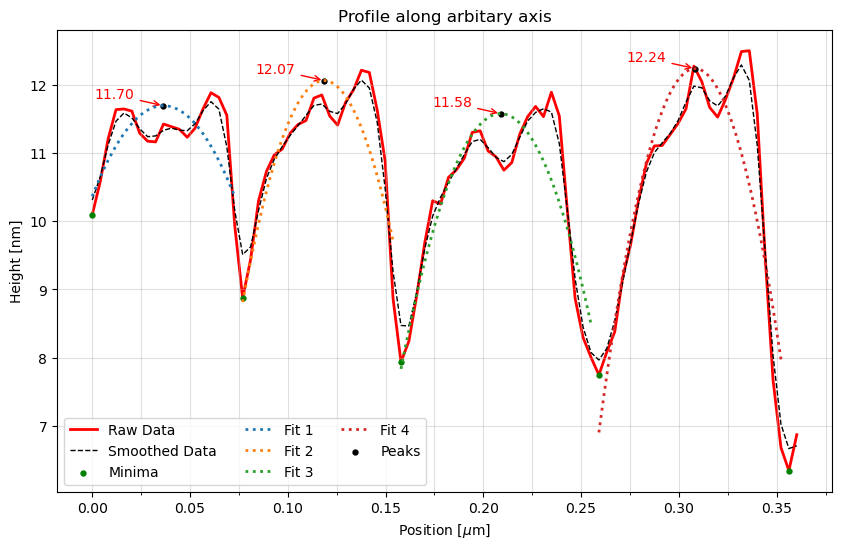

In [169]:
fig, ax = plt.subplots(figsize=(10,6))

###########################################################
###################### Plot raw data ######################
###########################################################
ax.plot(drift_data['x'], drift_data['y'], label='Raw Data',
        color='red', ls='-', lw=2, zorder=1)

###########################################################
################### Plot smoothed data ####################
###########################################################
ax.plot(drift_data['x'], smoothed_y_drift, label='Smoothed Data',
        color='black', ls='--', lw=1, zorder=2)
ax.set_title('Profile along arbitary axis')
ax.set_xlabel(r'Position [$\mu$m]')
ax.set_ylabel('Height [nm]')

###########################################################
################# Vertical line for debug #################
#ax.axvline(x=88.288e-9, color='blue', linestyle='-', lw=1)
###########################################################

ax.scatter(minima['x'], minima['y'], color='green', label='Minima', marker='.', s=50, zorder=5)

max_x_values = []
max_y_values = []
### Plot fit lines
drift_x = drift_data['x'].values
for i in range(len(minima_idx) - 1):
    start_idx = minima_idx[i]
    end_idx = minima_idx[i + 1]

    x_segment = drift_x[start_idx:end_idx]

    a, x0, b = fit_params[i]

    x_fit = np.linspace(x_segment[0], x_segment[-1], 300)
    y_fit = a * (x_fit - x0) ** 2 + b

    ax.plot(x_fit, y_fit, ':', label=f'Fit {i+1}', zorder=6, lw=2)
    max_id = np.argmax(y_fit)
    x_fit = x_fit
    max_x_values.append(x_fit[max_id]) 
    max_y_values.append(y_fit[max_id])

### Plot drift peaks
ax.scatter(max_x_values, max_y_values, color='black', label='Peaks', marker='.', s=50, zorder=4)
for x, y in zip(max_x_values, max_y_values):
    ax.annotate(f'{y:.2f}',
            xy=(x, y),
            xytext=((x - .035, y + .1)),
            arrowprops=dict(arrowstyle='->', color='red'),
            color='red'
    )


#############################################################
############ Plot the fit function in a text box ############
# eq_text = (
#     r'Fit Equation:' + '\n' +
#     rf'$f(x) = {latex_sci(a)} \,\sin\!\left(\frac{{2\pi x}}{{{{{latex_sci(b)}}}}} + {c:.2f}\right) + {latex_sci(d)}$'
# )
# eq_text_2 = rf'Mean Smoothed Peak Distance: ${latex_sci(mean_peak_dist)}$'

# plt.text(
#     0.527, 0.11,
#     eq_text,
#     horizontalalignment='left',
#     transform=plt.gca().transAxes,
#     fontsize=10,
#     verticalalignment='top', bbox=dict(boxstyle='round,pad=0.4', fc='white', edgecolor='black')
# )

# plt.text(
#     0.602, 0.15,
#     eq_text_2,
#     horizontalalignment='left',
#     transform=plt.gca().transAxes,
#     fontsize=10,
#     verticalalignment='center', bbox=dict(boxstyle='round,pad=0.4', fc='white', edgecolor='black')
# )


ax.xaxis.set_major_locator(MultipleLocator(.05))
ax.xaxis.set_minor_locator(MultipleLocator(.025))
ax.grid(True, which='both', ls='-', alpha=0.4)
ax.legend(ncol=3)
plt.show()

In [178]:
delta_x_backward = np.diff(x_distances_backward)
# print(x_distances_backward)
# print(delta_x_backward)
average_distance_backward = np.mean(delta_x_backward)
total_x_distance_backward = x_distances_backward[-1] - x_distances_backward[0]
difference_in_distances = total_x_distance_backward - total_x_distance_forward
difference_in_averages = average_distance_backward - average_distance_forward
print('Distances are in the same scale as the graph I think.')
print(f'The average distance for the forward pass is {average_distance_forward:.4f}.')
print(f'Total distance for the forward pass is {total_x_distance_forward:.4f}')
print(f'The average distance for the backward pass is {average_distance_backward:.4f}.')
print(f'Total distance for the backward pass is {total_x_distance_backward:.4f}')
print(f'The difference in distances is {difference_in_distances:.4f}.')
print(f'The difference in averages is {difference_in_averages:.4f}.')

Distances are in the same scale as the graph I think.
The average distance for the forward pass is 0.0910.
Total distance for the forward pass is 0.2709
The average distance for the backward pass is 0.0918.
Total distance for the backward pass is 0.2753
The difference in distances is 0.0043.
The difference in averages is 0.0008.


In [188]:
# Calculate drift velo
line_time = 60e-3   # Seconds
total_lines = 128
total_time = line_time + total_lines * 2 # seconds
drift_velo = difference_in_distances / total_time
print(f'Drift velocity: {drift_velo:.4e} μm/s')

Drift velocity: 1.6964e-05 μm/s


### For task 5

In [189]:
lattice_param_1 = 269
lattice_param_2 = 294
angle = 120
# lattice param is hypotenuse
lattice_param_avg = (lattice_param_1 + lattice_param_2) / 2

atom_dist_1 = lattice_param_1 * np.sin(angle)
atom_dist_2 = lattice_param_2 * np.sin(angle)
atom_dist_avg = lattice_param_avg * np.sin(angle)

print(f'1st value for a: {atom_dist_1}')
print(f'Second value for a: {atom_dist_2}')
print(f'Average value for a: {atom_dist_avg}')

1st value for a: 156.18440855311255
Second value for a: 170.6996881584204
Average value for a: 163.44204835576647
